In [1]:
import csv
import matplotlib
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
from math import sqrt
import analyze
from itertools import chain

/Users/steve/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
hosps = {
    'Santa Clara County since 3/12' : {
        'day' : np.array([12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23]),
        'count' : np.array([37, 38, 48, 52, 56, 62, 65, 93, 108, 116, 125])
    },
    'New York State since 3/17' : {
        'day' : np.array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26]), # 12, 13, 14, 15, 16, 
        'count' : np.array([264, 549, 777, 1255, 1603, 1974, 2635, 3234, 3805, 5327]) # 47, 50, 117, 137, 158, 
    }
}

In [3]:
def calculate_growth(days, series):
  model = analyze.ExponentialGrowthRateEstimator(family='NegativeBinomial', alpha=None)
  model.fit(day=days, cases=series)
  print(np.diff(series) / np.diff(days))
  print(model.fitted_glm.mu)
  est = model.growth_rate()
  low, high = model.growth_rate_confint()
  return (max(low, 0), est, high)

In [4]:
growths = dict()
dataset = hosps.items()
for k, v in dataset:
  days = v['day']
  count = v['count']
  #try:
  growth = calculate_growth(days, count)
  if growth:
    print(' (for %s)' % k)
    growths[k] = growth
  #except Exception:
  #  print('Failed to calculate for %s' % k)

[0.         0.         0.         0.52495844 0.         0.
 0.         0.         0.         0.        ]
[ 1. 10.  4.  2.  6.  3. 28. 15.  8.  9.]
[ 4.03718844  4.59300912  5.2253525   7.23701441  7.69432366  8.75364111
  9.95880028 11.32987996 12.8897233  14.66431836]
 (for Santa Clara County since 3/12)
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 285.  228.  478.  348.  371.  661.  599.  571. 1522.]
[ 241.27248034  289.35666713  347.02374964  416.18354264  499.12647576
  598.59944779  717.89679831  860.96940939 1032.55555066]
 (for New York State since 3/17)


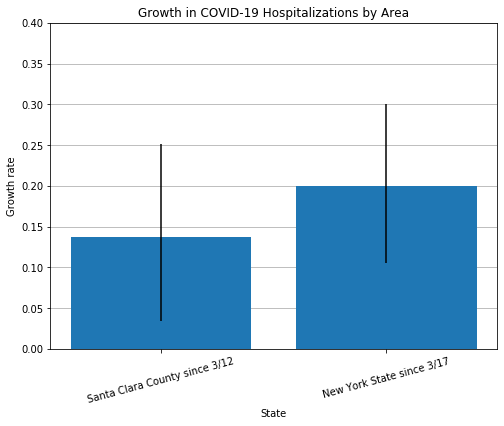

In [5]:
to_plot = growths
names = list(to_plot.keys())
err_l = list([v[1]-v[0] for v in to_plot.values()])
ests  = list([v[1] for v in to_plot.values()])
err_h = list([v[2]-v[1] for v in to_plot.values()])
errs = np.array([err_l, err_h])
plt.rcParams['axes.axisbelow'] = True
plt.bar(range(len(names)), ests, yerr=errs, align='center')
plt.ylim([0,0.4])
plt.grid(axis='y')
plt.xlabel('State')
plt.ylabel('Growth rate')
plt.xticks(rotation=15)
plt.title('Growth in COVID-19 Hospitalizations by Area')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8, 6)

plt.xticks(range(len(names)), names)
plt.show()